# In this project,We Predict the no. of rings for Abalone which is helpful for predicting the age of Abalone.

In [211]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [212]:
#reading a dataset
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [213]:
#to check how many rows and columns in dataframe
df.shape

(4177, 9)

In [214]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


### Since the Column "sex" is object type,so we can use labelencoder to convert into an integer type

In [215]:
from sklearn.preprocessing import LabelEncoder

df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [216]:
#to get statistics information
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [217]:
#to check all the values count in dependent variable 'Rings'
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

In [218]:
#to check whether any null values present in dataframe
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [219]:
df.corr()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [220]:
df.corr()['Rings'].sort_values()

Sex              -0.034627
Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

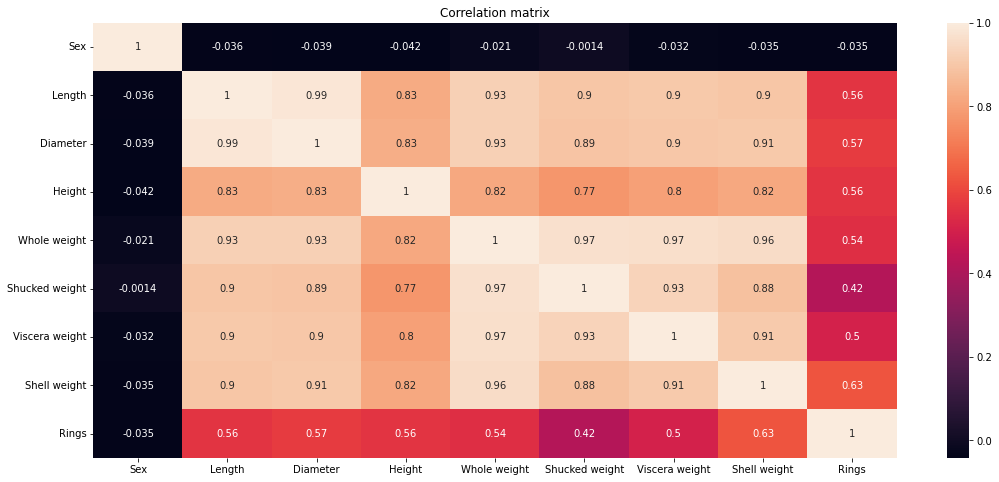

In [221]:
#plotting the correlation matrix

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

## from the above graph,
##1)column 'Shell weight' has positive high correlation with target variable
##2)column 'Shucked weight' has positive least correlation with target
##3)column 'Sex' has negative least correlation with target variable. 

## Checking with Outliers

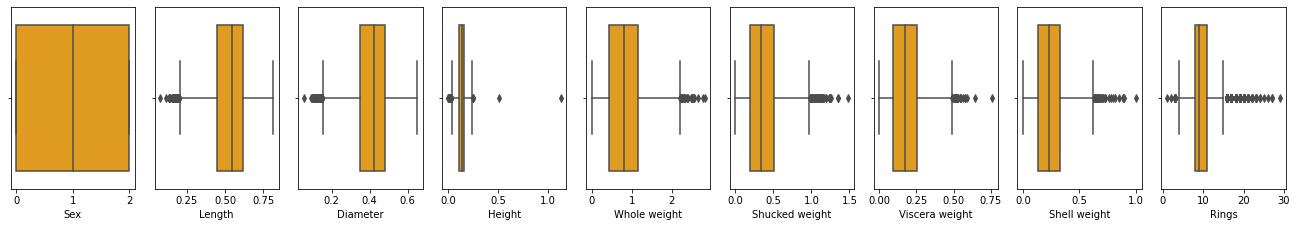

In [222]:
import warnings
warnings.filterwarnings('ignore')
column_list = df.columns.values
n_col = 31
n_row = 40
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

##With the above observation,
###independent variables like 'shell weight','Shucked weight','Whole weight'and 'Viscera weight' has more outliers compared to other variables.

## Skewness:-

In [223]:
df.skew()

Sex              -0.098155
Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

with the above skewness information,we can set the skweness threshold as 0.75.

## Ploting a Normal Distribution Curve

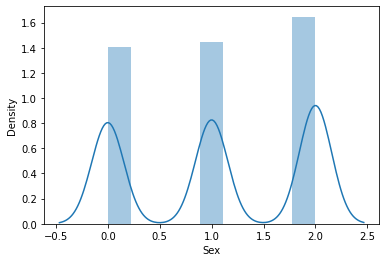

In [224]:
sns.distplot(df['Sex'])

the data of this column is not normalized and building data blocks is out of normalized curve.

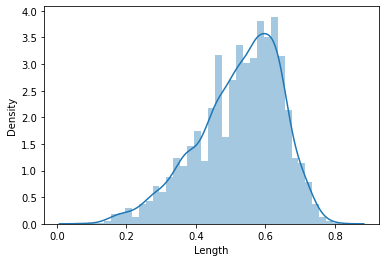

In [225]:
sns.distplot(df['Length'])

the data of this column is not normalized and building data blocks is out of normalized curve.

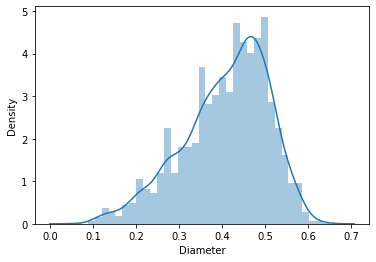

In [226]:
sns.distplot(df['Diameter'])

the data of this column is not normalized and building data blocks is out of normalized curve.

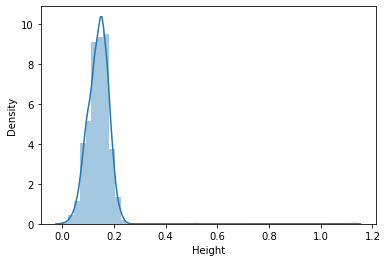

In [227]:
sns.distplot(df['Height'])

the data of this column is pretty much normalized.

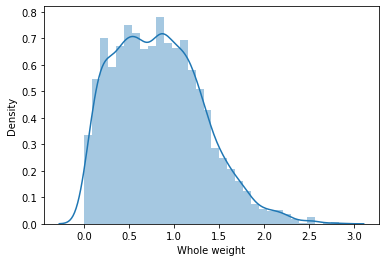

In [228]:
sns.distplot(df['Whole weight'])

the data of this column is not normalized and building data blocks is out of normalized curve.

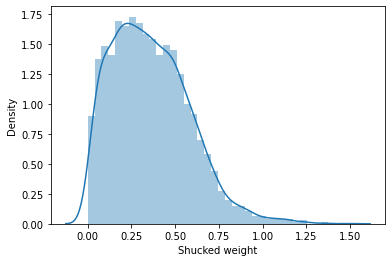

In [229]:
sns.distplot(df['Shucked weight'])

the data of this column is not normalized and building data blocks is out of normalized curve.

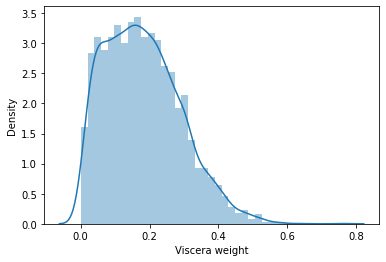

In [230]:
sns.distplot(df['Viscera weight'])

the data of this column is not normalized and building data blocks is out of normalized curve.

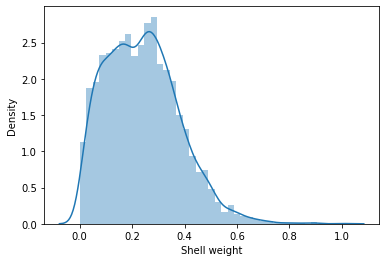

In [231]:
sns.distplot(df['Shell weight'])

the data of this column is not normalized and building data blocks is out of normalized curve.

## with the above observation,we can see that the "height" column data is normalized.
###1)Although we set the threshold of 0.75 for skewness with that we could have removed the "height" column which has more skewness then threshold.
###2)But considering the outliers and normalized data where we got good response of this column.
###3)so,we cannot remove "height" column.


---



---



## Removing the Outliers

In [242]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(4177, 9)

In [243]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(4177, 9)
(4027, 9)
150


## calcuating the percentage of data loss

In [244]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:3.59%


### Dividing the Target variable and independent variables

In [245]:
y = df[["Rings"]]
x = df.drop(["Rings"],axis=1)


## Transforming data to eliminate skewness

In [246]:
# removing the skewness from power_transform funtion

from sklearn.preprocessing import power_transform
x = power_transform(x)


from sklearn.preprocessing import power_transform
y = power_transform(y)



## Selecting a best random state

In [267]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.6321613885612941  on Random state  31


In [268]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =.20,random_state=31)

In [269]:
print(x_train.shape,y_train.shape)

(3341, 8) (3341, 1)


In [270]:
print(x_test.shape,y_test.shape)

(836, 8) (836, 1)


In [271]:
#to predict the the no.of rings,we can consider Linearregression model
LR = LinearRegression()
LR.fit(x_train,y_train)
predic = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))

r2_score is 0.632


In [272]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))

r2_score is 0.632


In [273]:
#using Ridge
from sklearn.linear_model import Ridge 
Rd = Ridge()
Rd.fit(x_train,y_train)
Rd = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))

r2_score is 0.632


In [274]:
#Using Lasso model
from sklearn.linear_model import Lasso
LS = Lasso()
LS.fit(x_train,y_train)
Rd = LS.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic)))

r2_score is 0.632


With the above observation looks like all these models giving same accuracy,now we can check whether is there any overfiiting

## Cross Validation to check with overfitting.

In [275]:
from sklearn.model_selection import cross_val_score

#for LinearRegression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Linear regression model : ",L_cr.mean())

cross validation for Linear regression model :  0.5129182722215002


In [276]:
L_cr = cross_val_score(Bay,x,y,cv=5)
print("cross validation for BayesianRidge model : ",L_cr.mean())

cross validation for BayesianRidge model :  0.5129448217938176


In [277]:
L_cr = cross_val_score(LS,x,y,cv=5)
print("cross validation for Lasso model : ",L_cr.mean())

cross validation for Lasso model :  -0.13536679414639025


with above observation,both Linear reg and BayesianRidge models are performing at same level and i will take my final model as LinearRegression model.

In [286]:
from sklearn.model_selection import GridSearchCV

params_list = {'fit_intercept':[False],
               'normalize':[True],
               'n_jobs' :[5]
              }
GCV = GridSearchCV(LinearRegression(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'fit_intercept': False, 'n_jobs': 5, 'normalize': True}

In [287]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
r2_score(y_test,GCV_predic)

0.6325673011129259

## Saving the model

In [289]:
import joblib
joblib.dump(GCV.best_estimator_,"no.of_rings.pkl")

['no.of_rings.pkl']